<a href="https://colab.research.google.com/github/EliasOrphelin/Analysis/blob/main/Couverture_vaccinale_par_age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

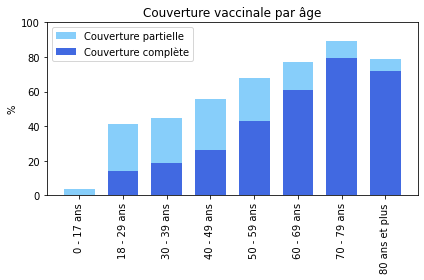

In [245]:
#data et bibliothèques
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
source_data_age= ("https://www.data.gouv.fr/fr/datasets/r/dc103057-d933-4e4b-bdbf-36d312af9ca9")

#3 data frames
data_age = pd.read_csv(source_data_age,sep=";")
data_complet=pd.DataFrame()
data_majeur=pd.DataFrame()

#on sort du tableau le total
data_complet[0]=data_age.iloc[10]
data_complet=data_complet.transpose()
data_age = data_age.drop([10])
data_age = data_age.drop(columns=['fra','jour'])

#on calcule la valeur pour les majeurs
data_majeur = data_age.sum(axis = 0, skipna = True)

#on calcule pour les mineurs
data_mineur=data_complet-data_majeur
data_mineur = data_mineur.drop(columns=['fra','jour'])
data_mineur['couv_tot_dose1']=data_mineur['n_tot_dose1']/data_mineur['pop']*100
data_mineur['couv_tot_complet']=data_mineur['n_tot_complet']/data_mineur['pop']*100
data_mineur=data_mineur.rename(index={0: "0 - 17 ans"})

#On fusionne les 2 lignes entre 18 et 29 ans, les 2 lignes entre 60 et 69 ans, et celles entre 70 et 79
new_row = data_age.loc[1] +  data_age.loc[0] 
new_row.name = '18 - 29 ans'
new_row["couv_tot_dose1"]=new_row["n_tot_dose1"]/new_row["pop"]*100
new_row["couv_tot_complet"]=new_row["n_tot_complet"]/new_row["pop"]*100
data_age = data_age.append([new_row])
data_age = data_age.drop([0,1])

new_row = data_age.loc[5] +  data_age.loc[6] 
new_row.name = '60 - 69 ans'
new_row["couv_tot_dose1"]=new_row["n_tot_dose1"]/new_row["pop"]*100
new_row["couv_tot_complet"]=new_row["n_tot_complet"]/new_row["pop"]*100
data_age = data_age.append([new_row])
data_age = data_age.drop([5,6])

new_row = data_age.loc[7] +  data_age.loc[8] 
new_row.name = '70 - 79 ans'
new_row["couv_tot_dose1"]=new_row["n_tot_dose1"]/new_row["pop"]*100
new_row["couv_tot_complet"]=new_row["n_tot_complet"]/new_row["pop"]*100
data_age = data_age.append([new_row])
data_age = data_age.drop([7,8])


#On renomme toutes les autres
data_age=data_age.rename(index={2: "30 - 39 ans",3: "40 - 49 ans",4: "50 - 59 ans",9: "80 ans et plus"})

#On agrège majeurs et mineurs
data_age=pd.concat([data_mineur,data_age])
data_age= data_age.drop(columns=['clage_vacsi'])
data_age=data_age.rename(columns={'couv_tot_complet': "Couverture complète",'couv_tot_dose1': "Couverture partielle",'n_tot_complet': "Vaccinés",'n_tot_dose1': "Primo-vaccinés",'pop': "Population"})
data_age=data_age.sort_index(ascending=True)

#On fait un graph
labels = data_age.index
primo_vaccinés = data_age['Couverture partielle']
vaccinés = data_age['Couverture complète']
width = 0.7

x = np.arange(len(labels))
fig, ax = plt.subplots()
rects1 = ax.bar(x , primo_vaccinés, width, label='Couverture partielle',color="lightskyblue")
rects2 = ax.bar(x , vaccinés, width, label='Couverture complète',color="royalblue")

ax.set_ylabel('%')
ax.set_title('Couverture vaccinale par âge')
ax.set_xticks(x)
plt.xticks(rotation='vertical')
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim(0, 100)

fig.tight_layout()

plt.show()